In [ ]:
## Visualization, sampling and data loading
import os
import PIL
import math
import cv2
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data modeling
import tensorflow as tf
from PIL import Image
from keras import Sequential
from sklearn.model_selection import cross_val_score
from keras import backend as K
from tensorflow import keras as keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score,  roc_curve, confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Layer, Input, Dense,Dropout, Conv2D, BatchNormalization, Flatten, Input, Conv2D, GaussianNoise,MaxPooling2D, Flatten, Dense, Dropout

### Model evaluation
from torchmetrics import Precision, Recall, Accuracy, AUROC
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')

### EER
from scipy.optimize import brentq
from scipy.interpolate import interp1d

In [ ]:
sondosaabed_casia_iris_thousand_path = "/content/drive/MyDrive/datasets/CASIA-Iris-Thousand/CASIA-Iris-Thousand/CASIA-Iris-Thousand/CASIA-Iris-Thousand"

In [ ]:
def load_dataset(path):

    labels = []
    images = []

    for folder in os.listdir(path):
        for lr in os.listdir(path+'/'+folder): #left or right
            for image in os.listdir(path+'/'+folder+'/'+lr):
                if image.endswith('b') is False:
                    images.append(path+'/'+folder+'/'+lr+'/'+image)
                    labels.append(folder+'-'+lr) #+'-'+lr

    df = pd.DataFrame(list(zip(labels, images)), columns=['Label', 'ImagePath'])
    return df, labels, images

In [ ]:
df, labels, images = load_dataset(sondosaabed_casia_iris_thousand_path)

#### Exploring Dataset


In [ ]:
def missing_values(df):

    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': (missing_count.values / len(df)) * 100
    })
    return  missing_percetanges

In [ ]:
def explore_data(df):

    head = pd.DataFrame(df.head())
    tail = pd.DataFrame(df.tail())
    nunique = pd.DataFrame(df.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(df.describe())
    dtypes =  pd.DataFrame(df.dtypes, columns=["Datatype"])
    labels_distribution = pd.DataFrame(df['Label'].value_counts())
    results = {
        'Table 1: Dataset Head:':head,
        'Table 2: Dataset Tail:':tail,
        'Table 3: Dataset Numerical Describtion: ':describe,
        'Table 4: Missing Values By Percentage': missing_values(df),
        'Table 5: Dataset Columns Data types: ':dtypes,
        'Table 6: Number of uniques in the datasets:':nunique,
        'Table 7: Labels Distribution:':labels_distribution}
    return results

In [ ]:
def print_dataset_exploration(results):

    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 4: Missing Values By Percentage':
            print("Total Sum of Missing Percentage: ", dataframe['Percentage'].sum())
        display(dataframe)

In [ ]:
print_dataset_exploration(explore_data(df))

Table 1: Dataset Head:


,Label,ImagePath
0,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
1,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
2,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
3,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
4,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...


Table 2: Dataset Tail:


,Label,ImagePath
19995,999-R,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
19996,999-R,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
19997,999-R,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
19998,999-R,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
19999,999-R,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...


Table 3: Dataset Numerical Describtion: 


,Label,ImagePath
count,20000,20000
unique,2000,20000
top,000-L,/content/drive/MyDrive/datasets/CASIA-Iris-Tho...
freq,10,1


Table 4: Missing Values By Percentage
Total Sum of Missing Percentage:  0.0


,Column,Counts,Percentage
0,Label,0,0.0
1,ImagePath,0,0.0


Table 5: Dataset Columns Data types: 


,Datatype
Label,object
ImagePath,object


Table 6: Number of uniques in the datasets:


,#_of_Unique
Label,2000
ImagePath,20000


Table 7: Labels Distribution:


,count
Label,
000-L,10
664-R,10
671-L,10
670-R,10
670-L,10
...,...
330-R,10
330-L,10
329-R,10


##### Data Visualization


In [ ]:
def show_random_samples(df, num_samples):

    random.seed(12)
    num_samples = min(num_samples, df.shape[0])
    random_indices = random.sample(range(df.shape[0]), num_samples)
    num_rows = math.ceil(num_samples / 4)

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, idx in enumerate(random_indices):
        image_path = df.loc[idx, "ImagePath"]
        label = df.loc[idx, "Label"]

        image = Image.open(image_path)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Random Sample of the Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()

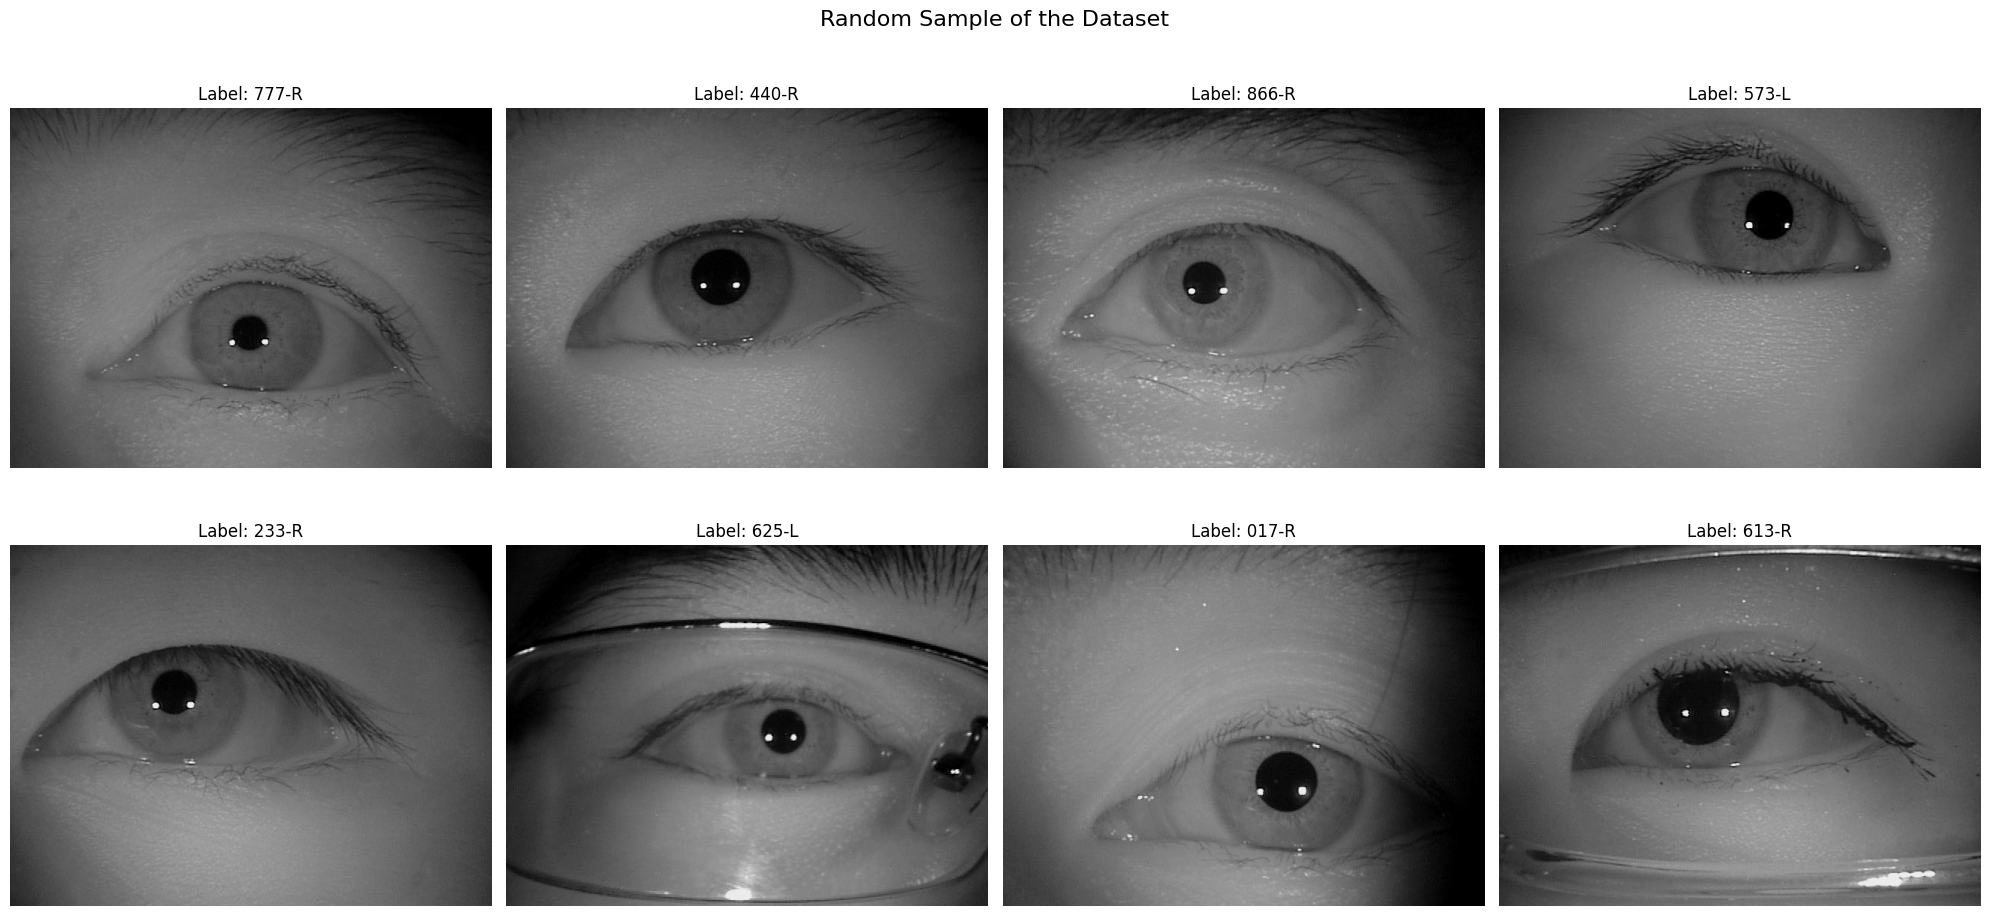

In [ ]:
show_random_samples(df, 8)

In [ ]:
img_path = df.iloc[75]['ImagePath']

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

height, width = img.shape

print(f"Shape: {img.shape}")
print(f"Height: {height}")
print(f"Width: {width}")

Shape: (480, 640)
Height: 480
Width: 640


#### Preparing Dataset


##### Images preparing
- In the dataset all the images have the same sizes and the same aspect ratios. However, due to processing resources limitations the decision is to resize all the images to a consistent size but smaller than that is now. The resizing algortihm is distortion free the sizes are changed but the aspect ratio is the same using pading values.

In [ ]:
# Dataset Config
SIZE = 20000
NUM_CLASSES = 2000
IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CHANNELS = 1
input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)

Resizing is done with keeping the aspect ratio

In [ ]:
def resize_keep_aspect_ration(img, target_height=IMG_HEIGHT, target_width=IMG_WIDTH, pad_value=255):

    aspect_ratio = img.shape[1] / img.shape[0]

    ## Get the new sizes with keeping the aspect ratio
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    resized_img = cv2.resize(img, (new_width, new_height))

    ## Padding up and down so the image is in the middle
    preprocessed_img = np.full((target_height, target_width), pad_value, dtype=np.uint8)
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    preprocessed_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img

    return preprocessed_img

**Preprocessing Methods**

In [ ]:
def segment_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Görüntü yüklenemedi: {img_path}")

    blurred_img = cv2.GaussianBlur(img, (9, 9), 2)
    edges = cv2.Canny(blurred_img, 50, 150)
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1.2, 50,
                               param1=50, param2=20, minRadius=30, maxRadius=80)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        x, y, r = circles[0]
        if y - r >= 0 and y + r <= img.shape[0] and x - r >= 0 and x + r <= img.shape[1]:
            segmented_img = img[y - r:y + r, x - r:x + r]
            segmented_img = resize_keep_aspect_ration(segmented_img)
            return segmented_img / 255.0

    resized_img = resize_keep_aspect_ration(img)
    return resized_img / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

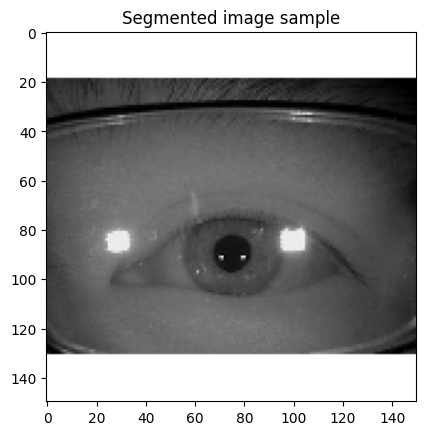

In [ ]:
plt.imshow(segment_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("Segmented image sample")
plt.show

In [ ]:
def center_crop_image(img_path, target_height=IMG_HEIGHT, target_width=IMG_WIDTH, margin_ratio=0.2):
    """
    Center crop işlemini daha geniş alan kalacak şekilde uygular.

    Args:
        img_path (str): Görüntü dosyasının yolu.
        target_height (int): Hedef yüksekliği.
        target_width (int): Hedef genişliği.
        margin_ratio (float): Kenarlardan korunacak oran (0 ile 1 arasında).

    Returns:
        np.array: Normalleştirilmiş center-cropped görüntü.
    """
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Görüntü yüklenemedi: {img_path}")

    height, width = img.shape

    # Kenarlardan margin bırakma
    margin_x = int(width * margin_ratio)  # Yatay kenar boşluğu
    margin_y = int(height * margin_ratio)  # Dikey kenar boşluğu

    # Yeni kırpma alanını hesapla
    crop_x_start = max(0, margin_x)
    crop_y_start = max(0, margin_y)
    crop_x_end = min(width, width - margin_x)
    crop_y_end = min(height, height - margin_y)

    # Görüntüyü merkezden kırpma (geniş alan)
    center_cropped_img = img[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

    # Hedef boyuta yeniden boyutlandırma (aspect ratio korunabilir)
    center_cropped_img = resize_keep_aspect_ration(center_cropped_img, target_height, target_width)

    # Normalleştirme
    return center_cropped_img / 255.0


<function matplotlib.pyplot.show(close=None, block=None)>

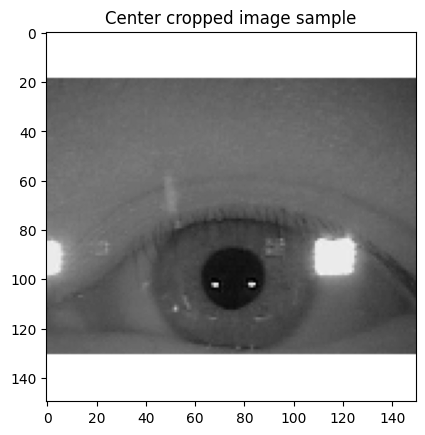

In [ ]:
plt.imshow(center_crop_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("Center cropped image sample")
plt.show

In [ ]:
def clahe_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Görüntü yüklenemedi: {img_path}")

    img = resize_keep_aspect_ration(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    img = cv2.medianBlur(img, 5)
    return img / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

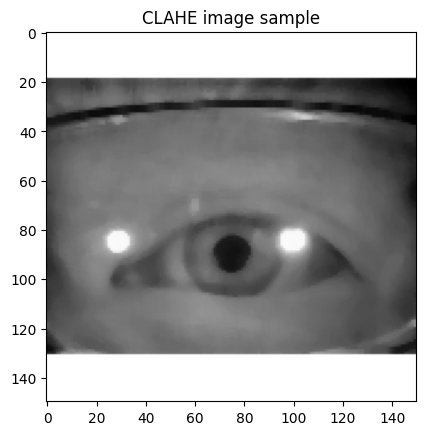

In [ ]:
plt.imshow(clahe_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("CLAHE image sample")
plt.show

In [ ]:
def gabor_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Görüntü yüklenemedi: {img_path}")

    # Optimize edilmiş Gabor filtresi parametreleri
    kernel_size = (20, 20)
    sigma = 2.0
    lambd = 5
    gamma = 0.5
    psi = 0

    # Farklı yönlerde (theta) Gabor filtresi uygulama
    gabor_filtered_imgs = []
    for theta in [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]:
        gabor_kernel = cv2.getGaborKernel(kernel_size, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, gabor_kernel)
        gabor_filtered_imgs.append(filtered_img)

    # Filtrelenmiş görüntülerin birleştirilmesi
    combined_img = np.max(gabor_filtered_imgs, axis=0)
    blurred_img = cv2.GaussianBlur(combined_img, (5, 5), 0)

    combined_img = resize_keep_aspect_ration(combined_img)

    return combined_img / 255.0

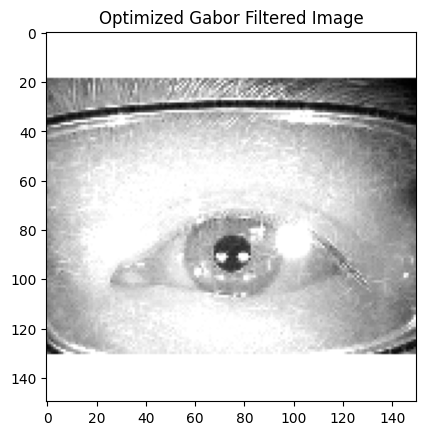

In [ ]:
# Örnek Gabor filtresi uygulanmış görüntü
img_path = df.iloc[15]['ImagePath']
gabor_img = gabor_image(img_path)

# Görselleştirme
plt.imshow(gabor_img, cmap="gray")
plt.title("Optimized Gabor Filtered Image")
plt.show()


In [ ]:
def clahe_gabor_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Görüntü yüklenemedi: {img_path}")

    # 1. CLAHE Uygulama
    img = resize_keep_aspect_ration(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    img = cv2.medianBlur(img, 5)

    # 2. Gabor Filtresi Uygulama
    kernel_size = (20, 20)
    sigma = 2.0
    lambd = 4
    gamma = 0.5
    psi = 0

    gabor_filtered_imgs = []
    for theta in [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]:
        gabor_kernel = cv2.getGaborKernel(kernel_size, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, gabor_kernel)
        gabor_filtered_imgs.append(filtered_img)

    combined_img = np.max(gabor_filtered_imgs, axis=0)
    combined_img = cv2.GaussianBlur(combined_img, (5, 5), 0)

    combined_img = resize_keep_aspect_ration(combined_img)

    return combined_img / 255.0


<function matplotlib.pyplot.show(close=None, block=None)>

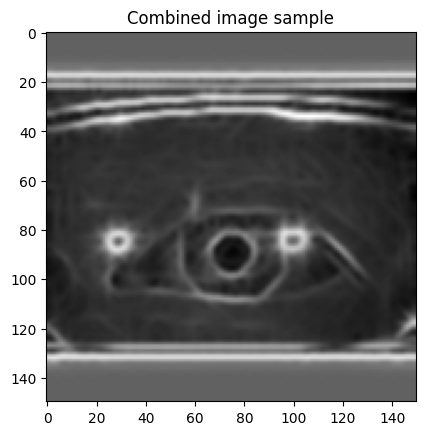

In [ ]:
plt.imshow(clahe_gabor_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("Combined image sample")
plt.show

##### Labels Preparing:


In [ ]:
def preprocess_labels(df):

    labels = df['Label'].astype(str)
    le = LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)
    return labels

In [ ]:
print("Label after encoding: ", preprocess_labels(df)[120])
print("Label before encoding: ",df.iloc[120]['Label'])

Label after encoding:  12
Label before encoding:  006-L


- Split the dataset into trainig, testing and validation dataset. The splitting rule is 80:10:10

In [ ]:
def split_dataset(preprocessed_images, preprocessed_labels, train_size=0.8, validation_size=0.1, shuffle=True):
    """
    Returns the splitted dataset using the 80:10:10 split rule (for deep learnig we do train split) Pareto principle
    Args:
        preprocessed_images()
        preprocessed_labels
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    np.random.seed(666)
    indices = np.arange(SIZE)
    if shuffle:
        np.random.shuffle(indices)

    train_samples = int(SIZE * train_size)
    validation_samples = int(SIZE * validation_size)

    train_indices = indices[:train_samples]
    validation_indices = indices[train_samples:train_samples + validation_samples]
    test_indices = indices[train_samples + validation_samples:]

    x_train  = preprocessed_images[train_indices]
    y_train = preprocessed_labels[train_indices]
    x_valid = preprocessed_images[validation_indices]
    y_valid = preprocessed_labels[validation_indices]
    x_test = preprocessed_images[test_indices]
    y_test = preprocessed_labels[test_indices]

    return x_train, x_valid, x_test, y_train, y_valid, y_test

Dataset preparation for the training

In [ ]:
from concurrent.futures import ThreadPoolExecutor

def process_image_parallel(img_path, preprocess_function):
    try:
        return preprocess_function(img_path)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

def prepare_dataset_in_chunks(df, preprocess_function, chunk_size=500):
  
    preprocessed_images = []

    for start in range(0, len(df), chunk_size):
        end = min(start + chunk_size, len(df))
        chunk = df.iloc[start:end]  # Select a chunk of the DataFrame

        # Parallel processing within the chunk
        with ThreadPoolExecutor() as executor:
            chunk_images = list(executor.map(lambda img_path: process_image_parallel(img_path, preprocess_function), chunk['ImagePath']))

        # Remove None values and add to the preprocessed list
        preprocessed_images.extend([img for img in chunk_images if img is not None])

    # Convert to numpy array and reshape for CNN
    preprocessed_images = np.array(preprocessed_images).reshape(-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)

    # Encode labels
    preprocessed_labels = preprocess_labels(df)

    # Split the dataset
    return split_dataset(preprocessed_images, preprocessed_labels)


In [ ]:
# Preprocessing yöntemleri
preprocessing_methods = [segment_image, center_crop_image, clahe_image, gabor_image, clahe_gabor_image]

datasets = {}

for method in preprocessing_methods:
    print(f"{method.__name__} için dataset hazırlanıyor...")
    datasets[method.__name__] = prepare_dataset_in_chunks(df, method, chunk_size=500)

print("Tüm preprocessing yöntemleri için datasetler hazır.")


segment_image için dataset hazırlanıyor...
center_crop_image için dataset hazırlanıyor...
clahe_image için dataset hazırlanıyor...
gabor_image için dataset hazırlanıyor...
clahe_gabor_image için dataset hazırlanıyor...
Tüm preprocessing yöntemleri için datasetler hazır.


### **Data modeling**

- Training Setup and configuration, callbacks: for better training setup three callbacks were used one that is used for early stopping based on the validation loss (minimization). One saves the model best weights called model checkpointing and finally the Reduce LR on Platea wich monitors the validation loss and changes to the goal of (minimization) of it

In [ ]:
# Training Config:
EPOCHS = 100
BATCH_SIZE = 32
loss = 'sparse_categorical_crossentropy'
activation = "leaky_relu"
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

#### Model Archeticticure:

In [ ]:
def create_model():
    padding = 'same'
    poolpadding = 'valid'

    model = Sequential([
        Input(input_shape),
        ####### Features extraction

        Conv2D(32, (5, 5), padding=padding, activation=activation, name="Conv1"),
        BatchNormalization(axis=-1, name="BN1"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool1"),
        GaussianNoise(0.1, name="GaussianNoise"),
        Dropout(0.1, name="Dropout1"),

        Conv2D(64, (5, 5), padding=padding, activation=activation, name="Conv2"),
        BatchNormalization(axis=-1, name="BN2"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool2"),
        Dropout(0.1, name="Dropout2"),

        Conv2D(128, (5, 5), padding=padding, activation=activation, name="Conv3"),
        BatchNormalization(axis=-1, name="BN3"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool3"),
        Dropout(0.25, name="Dropout3"),

        Conv2D(256, (3, 3), padding=padding, activation=activation, name="Conv4"),
        BatchNormalization(axis=-1, name="BN4"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool4"),
        Dropout(0.25, name="Dropout4"),

        Conv2D(256, (3, 3), padding=padding, activation=activation, name="Conv5"),
        BatchNormalization(axis=-1, name="BN5"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool5"),
        Dropout(0.25, name="Dropout5"),

        Conv2D(512, (3, 3), padding=padding, activation=activation, name="Conv6"),
        BatchNormalization(axis=-1, name="BN6"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool6"),
        Dropout(0.45, name="Dropout6"),

        Conv2D(512, (2, 2), padding=padding, activation=activation, name="Conv7"),
        BatchNormalization(axis=-1, name="BN7"),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool7"),
        Dropout(0.5, name="Dropout7"),

        #### Flatten and fully connected layers, classifier using relu sofftmax
        Flatten(),
        Dense(128, activation=activation, name = "Dense1"),
        Dense(2000, activation='softmax', name="SoftmaxClasses"),
    ],
    name="IRISRecognizer")
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

#### Model

In [ ]:
model = create_model()
model.summary()

Model: "IRISRecognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 150, 150, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN1 (BatchNormalization)             │ (None, 150, 150, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mpool1 (MaxPooling2D)                │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GaussianNoise (GaussianNoise)        │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN2 (BatchNormalization)             │ (None, 75, 75, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mpool2 (MaxPooling2D)                │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 37, 37, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN3 (BatchNormalization)             │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mpool3 (MaxPooling2D)                │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout3 (Dropout)                   │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN4 (BatchNormalization)             │ (None, 18, 18, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mpool4 (MaxPooling2D)                │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout4 (Dropout)                   │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 9, 9, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN5 (BatchNormalization)             │ (None, 9, 9, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mpool5 (MaxPooling2D)                │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout5 (Dropout)                   │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,702,224 (14.12 MB)

 Trainable params: 3,698,704 (14.11 MB)

 Non-trainable params: 3,520 (13.75 KB)

Segmented Images

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = datasets['segment_image']

segmented_model = create_model()

history_segmented = segmented_model.fit(
    np.array(x_train),
    y_train,
    validation_data=(np.array(x_valid), y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 3.0169e-04 - loss: 7.7072 - val_accuracy: 0.0015 - val_loss: 7.6656 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.0024 - loss: 7.4129 - val_accuracy: 0.0020 - val_loss: 7.5774 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.0138 - loss: 6.5960 - val_accuracy: 0.0135 - val_loss: 6.6845 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0318 - loss: 5.8837 - val_accuracy: 0.0505 - val_loss: 5.9554 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.0651 - loss: 5.2736 - val_accuracy: 0.1005 - val_loss: 5.4382 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.1241 - loss: 4.6600 - val_accuracy: 0.1435 - val_loss: 5.1081 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy:

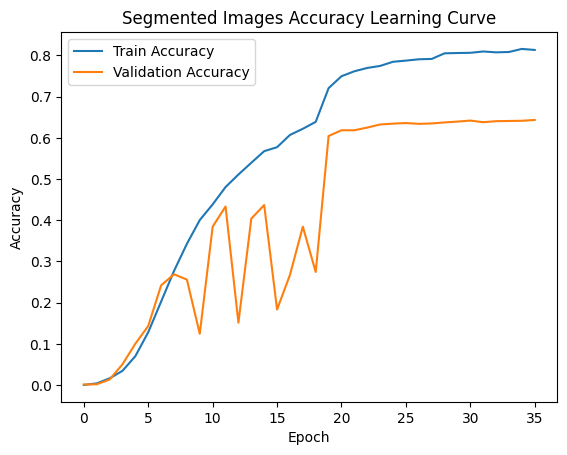

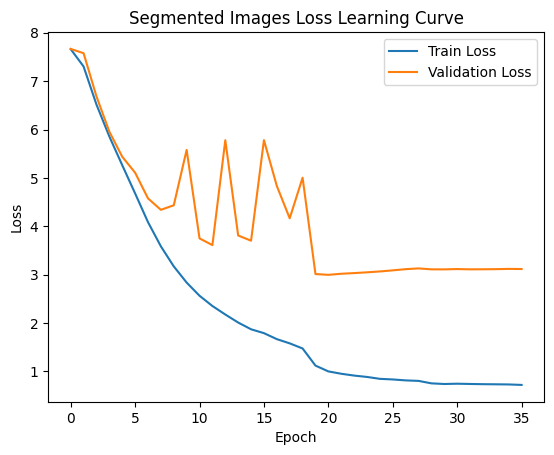

In [ ]:
# Accuracy grafiği
plt.figure()
plt.plot(history_segmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_segmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Segmented Images Accuracy Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss grafiği
plt.figure()
plt.plot(history_segmented.history['loss'], label='Train Loss')
plt.plot(history_segmented.history['val_loss'], label='Validation Loss')
plt.title('Segmented Images Loss Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test seti performansı
test_loss_seg, test_acc_seg = segmented_model.evaluate(np.array(x_test), y_test)
print(f"Segmented Model Test Accuracy: {test_acc_seg *100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6535 - loss: 2.7829
Segmented Model Test Accuracy: 64.60%


Center Cropped Images

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = datasets['center_crop_image']

center_crop_model = create_model()
center_crop_optimizer = Adam(learning_rate=initial_learning_rate)  # Yeni optimizer
center_crop_model.compile(optimizer=center_crop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_center_crop = center_crop_model.fit(
    np.array(x_train),
    y_train,
    validation_data=(np.array(x_valid), y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.0011 - loss: 7.6493 - val_accuracy: 5.0000e-04 - val_loss: 9.6121 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.0096 - loss: 6.7641 - val_accuracy: 0.0065 - val_loss: 8.9121 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0343 - loss: 5.7190 - val_accuracy: 0.0065 - val_loss: 11.0014 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0928 - loss: 4.7612 - val_accuracy: 0.0020 - val_loss: 15.0314 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.1662 - loss: 3.9744 - val_accuracy: 0.1455 - val_loss: 4.6410 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.2595 - loss: 3.3108 - val_accuracy: 0.2420 - val_loss: 3.8111 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accurac

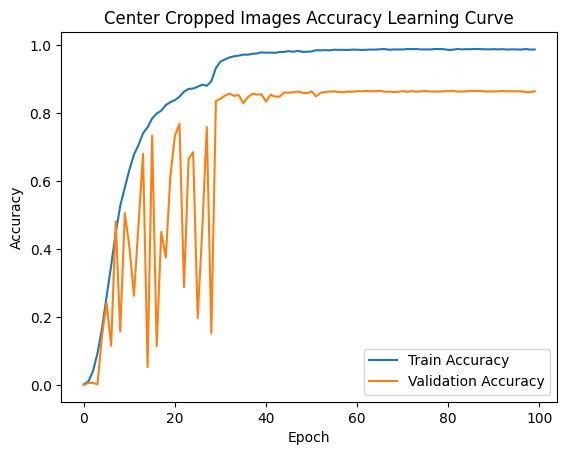

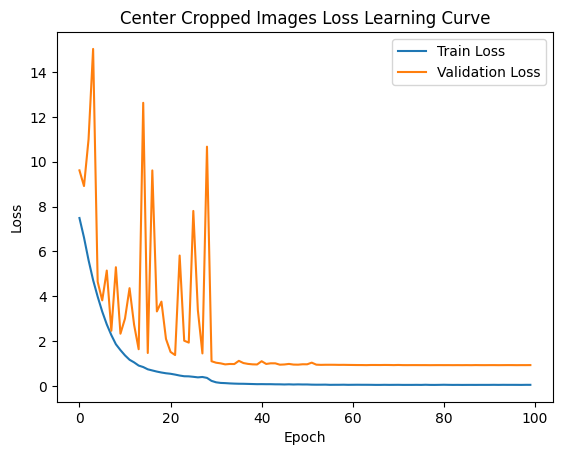

In [ ]:
# Accuracy grafiği
plt.figure()
plt.plot(history_center_crop.history['accuracy'], label='Train Accuracy')
plt.plot(history_center_crop.history['val_accuracy'], label='Validation Accuracy')
plt.title('Center Cropped Images Accuracy Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss grafiği
plt.figure()
plt.plot(history_center_crop.history['loss'], label='Train Loss')
plt.plot(history_center_crop.history['val_loss'], label='Validation Loss')
plt.title('Center Cropped Images Loss Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test seti performansı
test_loss_crop, test_acc_crop = center_crop_model.evaluate(np.array(x_test), y_test)
print(f"Center Cropped Model Test Accuracy: {test_acc_crop*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8815 - loss: 0.6767
Center Cropped Model Test Accuracy: 88.20%


CLAHE Images

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = datasets['clahe_image']

clahe_model = create_model()
clahe_optimizer = Adam(learning_rate=initial_learning_rate)  # Yeni optimizer
clahe_model.compile(optimizer=clahe_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_clahe = clahe_model.fit(
    np.array(x_train),
    y_train,
    validation_data=(np.array(x_valid), y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.0017 - loss: 7.6441 - val_accuracy: 0.0000e+00 - val_loss: 8.7379 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.0155 - loss: 6.3466 - val_accuracy: 0.0130 - val_loss: 6.9177 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.0676 - loss: 5.1737 - val_accuracy: 0.0510 - val_loss: 5.8396 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.1509 - loss: 4.1852 - val_accuracy: 0.2080 - val_loss: 4.0141 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.2860 - loss: 3.2513 - val_accuracy: 0.3985 - val_loss: 2.8970 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.4100 - loss: 2.5267 - val_accuracy: 0.3975 - val_loss: 2.9488 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy:

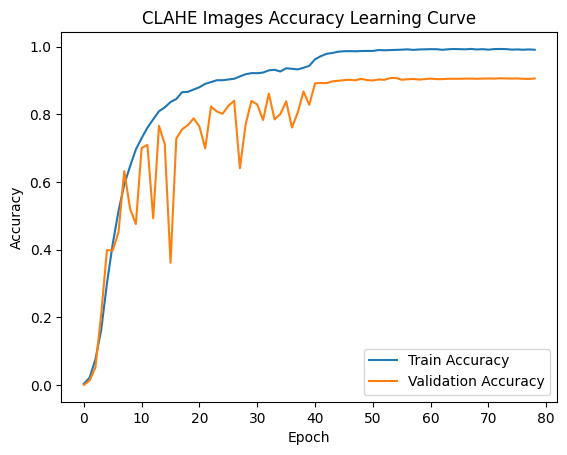

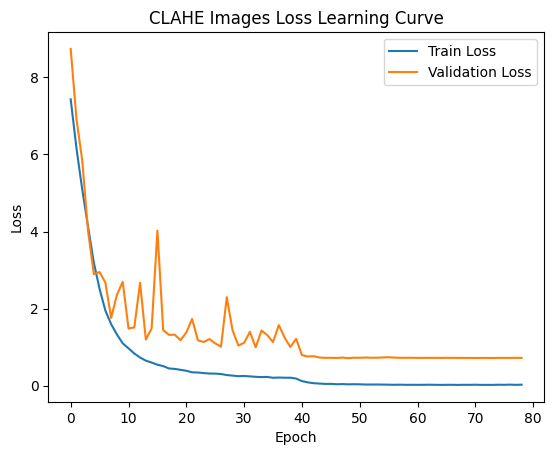

In [ ]:
# Accuracy grafiği
plt.figure()
plt.plot(history_clahe.history['accuracy'], label='Train Accuracy')
plt.plot(history_clahe.history['val_accuracy'], label='Validation Accuracy')
plt.title('CLAHE Images Accuracy Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss grafiği
plt.figure()
plt.plot(history_clahe.history['loss'], label='Train Loss')
plt.plot(history_clahe.history['val_loss'], label='Validation Loss')
plt.title('CLAHE Images Loss Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test seti performansı
test_loss_clahe, test_acc_clahe = clahe_model.evaluate(np.array(x_test), y_test)
print(f"CLAHE Model Test Accuracy: {test_acc_clahe *100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.4262
CLAHE Model Test Accuracy: 92.35%


Gabor Filtered Images

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = datasets['gabor_image']

gabor_model = create_model()
gabor_optimizer = Adam(learning_rate=initial_learning_rate)
gabor_model.compile(optimizer=gabor_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_gabor = gabor_model.fit(
    np.array(x_train),
    y_train,
    validation_data=(np.array(x_valid), y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.0022 - loss: 7.5643 - val_accuracy: 0.0030 - val_loss: 7.5301 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.0198 - loss: 6.1018 - val_accuracy: 0.0035 - val_loss: 15.0558 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0820 - loss: 4.9269 - val_accuracy: 0.0015 - val_loss: 17.1197 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.1920 - loss: 3.8177 - val_accuracy: 0.0050 - val_loss: 14.5509 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.3255 - loss: 2.9042 - val_accuracy: 0.0760 - val_loss: 6.4866 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.4654 - loss: 2.1909 - val_accuracy: 0.1730 - val_loss: 5.0702 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 

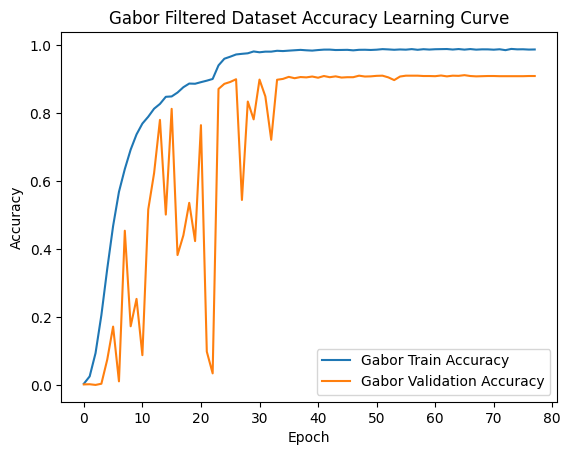

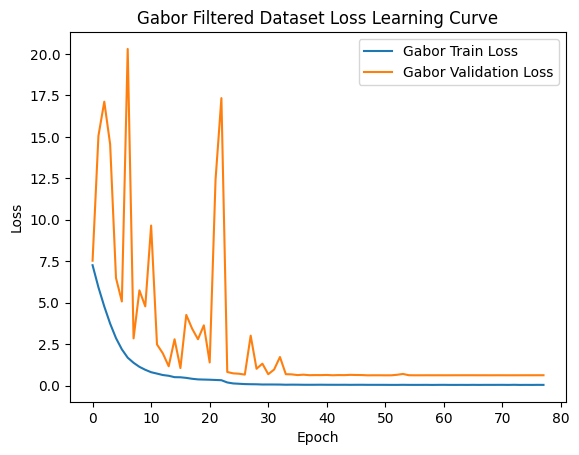

In [ ]:
# Accuracy grafiği
plt.figure()
plt.plot(history_gabor.history['accuracy'], label='Gabor Train Accuracy')
plt.plot(history_gabor.history['val_accuracy'], label='Gabor Validation Accuracy')
plt.title('Gabor Filtered Dataset Accuracy Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Loss grafiği
plt.figure()
plt.plot(history_gabor.history['loss'], label='Gabor Train Loss')
plt.plot(history_gabor.history['val_loss'], label='Gabor Validation Loss')
plt.title('Gabor Filtered Dataset Loss Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test performansı
test_loss_gabor, test_acc_gabor = gabor_model.evaluate(np.array(x_test), y_test)
print(f"Gabor Model Test Accuracy: {test_acc_gabor * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9284 - loss: 0.4306
Gabor Model Test Accuracy: 92.45%


CLAHE + Gabor Filtered Images

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = datasets['clahe_gabor_image']  

combine_model = create_model()  # Mevcut proje model fonksiyonu
combine_optimizer = Adam(learning_rate=initial_learning_rate)
combine_model.compile(optimizer=combine_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_combined = combine_model.fit(
    np.array(x_train),
    y_train,
    validation_data=(np.array(x_valid), y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 8.8942e-04 - loss: 7.6694 - val_accuracy: 0.0000e+00 - val_loss: 9.3430 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0134 - loss: 6.6913 - val_accuracy: 0.0045 - val_loss: 9.8908 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0732 - loss: 5.1374 - val_accuracy: 0.0085 - val_loss: 12.4271 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.1872 - loss: 3.8825 - val_accuracy: 0.0115 - val_loss: 11.5043 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.3354 - loss: 2.9020 - val_accuracy: 0.3050 - val_loss: 3.3375 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.4646 - loss: 2.1643 - val_accuracy: 0.2620 - val_loss: 3.6904 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - acc

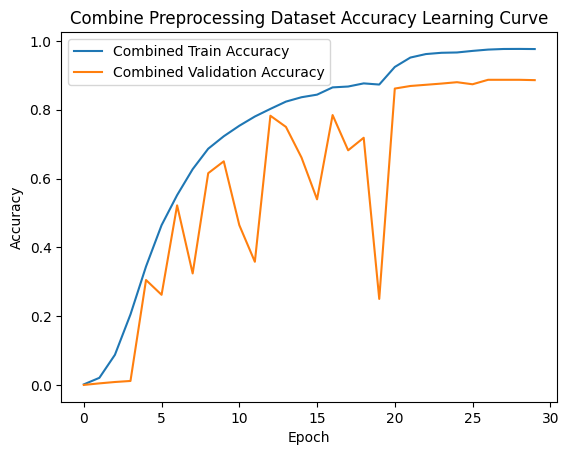

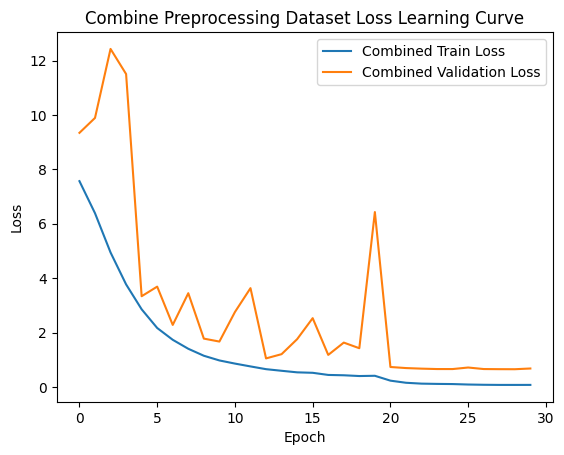

In [ ]:
# Accuracy grafiği
plt.figure()
plt.plot(history_combined.history['accuracy'], label='Combined Train Accuracy')
plt.plot(history_combined.history['val_accuracy'], label='Combined Validation Accuracy')
plt.title('Combine Preprocessing Dataset Accuracy Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss grafiği
plt.figure()
plt.plot(history_combined.history['loss'], label='Combined Train Loss')
plt.plot(history_combined.history['val_loss'], label='Combined Validation Loss')
plt.title('Combine Preprocessing Dataset Loss Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Test performansı
test_loss_combined, test_acc_combined = combine_model.evaluate(np.array(x_test), y_test)
print(f"Combine Model Test Accuracy: {test_acc_combined * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8965 - loss: 0.5286
Combine Model Test Accuracy: 89.15%


**Results**

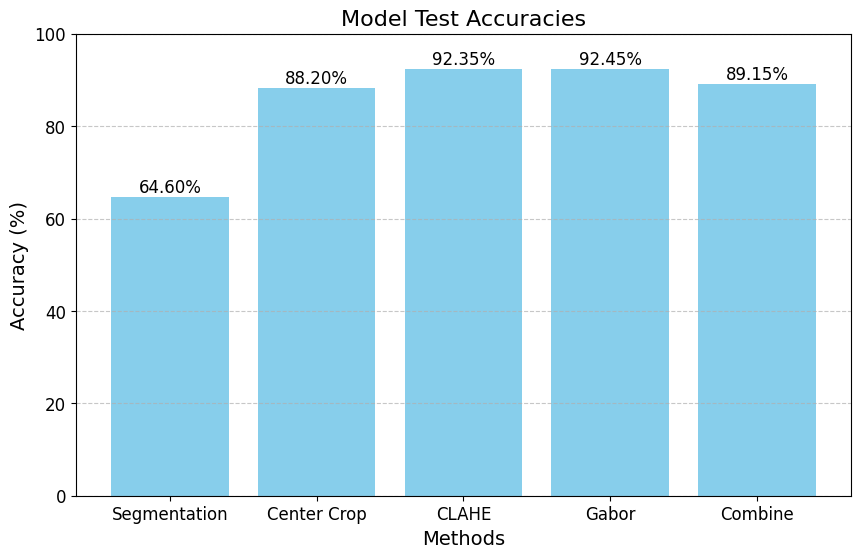

In [ ]:
methods = [ "Segmentation", "Center Crop", "CLAHE", "Gabor", "Combine"]
accuracies = [
    test_acc_seg * 100,
    test_acc_crop * 100,
    test_acc_clahe * 100,
    test_acc_gabor * 100,
    test_acc_combined * 100,
]

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.title("Model Test Accuracies", fontsize=16)
plt.xlabel("Methods", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(0, 100)  # Yüzdelik doğruluk oranları için uygun aralık
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Barların üzerinde değerleri göster
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=12)

plt.show()


Model Save

In [ ]:
combine_model.save('/content/drive/MyDrive/Colab Notebooks/Irıs_recognizer/IRISRecognizer.keras')


In [ ]:
loaded_combine_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Irıs_recognizer/IRISRecognizer.keras')

Predictions on sample images

In [ ]:
def evaluate_model_visualize(dataset, y_true, model, class_names):
   
    num_rows = 4
    num_cols = 6
    data_batch = dataset[0:num_rows * num_cols]
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx], cmap="gray")

        pred_idx = np.argmax(predictions[idx])
        true_idx = y_true[idx]

        title = f"{class_names[true_idx]} : {class_names[pred_idx]}"
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == true_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")
    acc = num_matches / (num_rows * num_cols)
    print("Prediction accuracy: {:.2%}".format(acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction accuracy: 91.67%


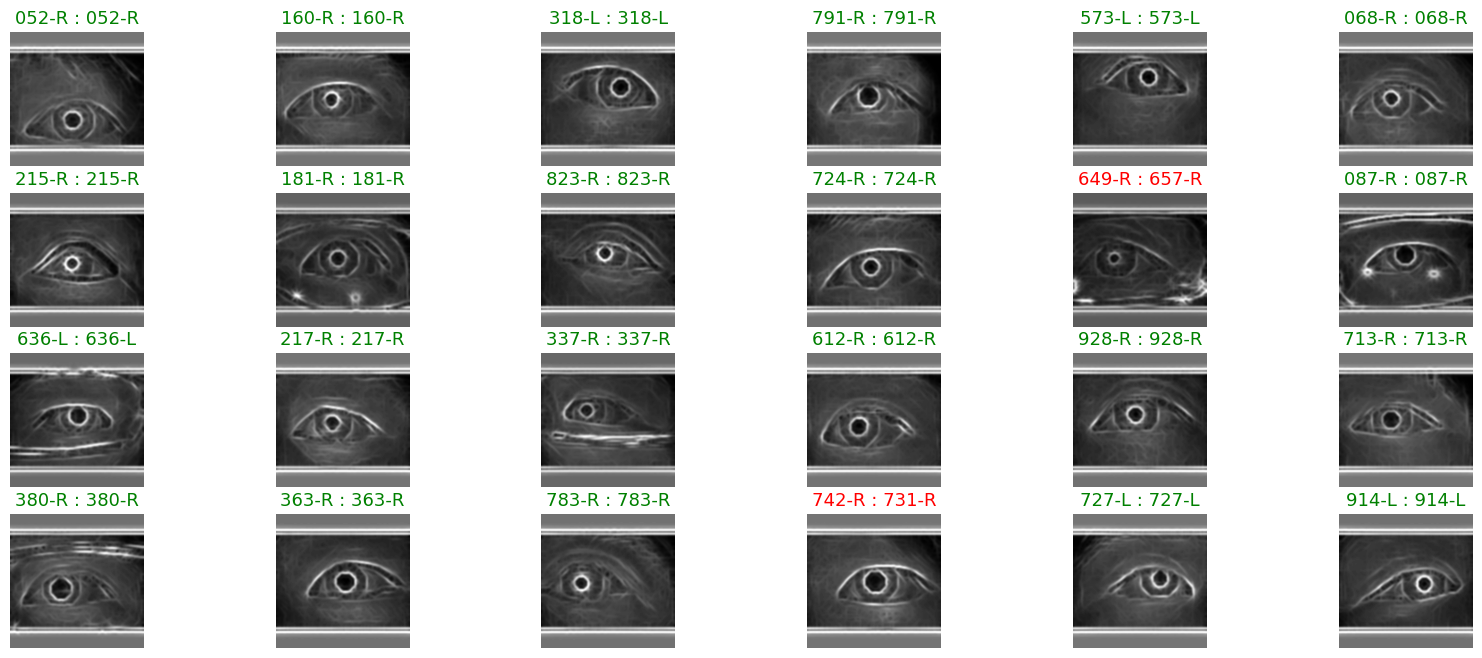

In [ ]:
evaluate_model_visualize(x_test,y_test, combine_model,df['Label'].unique())

#### Model Evaluation metrics:
The evaluation is done using the required metrics:
- **False Match Rate (FMR):** The rate at which an imposter is incorrectly classified as a genuine user.
- **False Non-Match Rate (FNMR):** The rate at which a genuine user is incorrectly classified as an imposter.
- **Plot the Receiver Operating Characteristic (ROC) curve**, which shows the trade-off between FMR and FNMR.
- **Determine the Equal Error Rate (EER)**, the point on the ROC curve where FMR and FNMR are equal.

In [169]:
probabilities = loaded_combine_model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [170]:
precision = Precision(task="multiclass", num_classes=2000)
recall = Recall(task="multiclass", num_classes=2000)
accuracy = Accuracy(task="multiclass", num_classes=2000)
maurc = AUROC(task="multiclass",num_classes=2000)

In [172]:
accuracyv = accuracy(torch.tensor(probabilities), torch.tensor(y_test))
prec = precision(torch.tensor(probabilities), torch.tensor(y_test))
rec = recall(torch.tensor(probabilities), torch.tensor(y_test))
aurc = maurc(torch.tensor(probabilities), torch.tensor(y_test))

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


In [173]:
print(f"Accuracy: {accuracyv}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")

Accuracy: 0.8914999961853027
Precision: 0.8914999961853027
Recall: 0.8914999961853027


In [174]:
fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = 2000

for i in range(num_classes):
    y_true_binary = np.where(y_test == i, 1, 0)
    fpr[i], tpr[i], _ = roc_curve(y_true_binary, probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

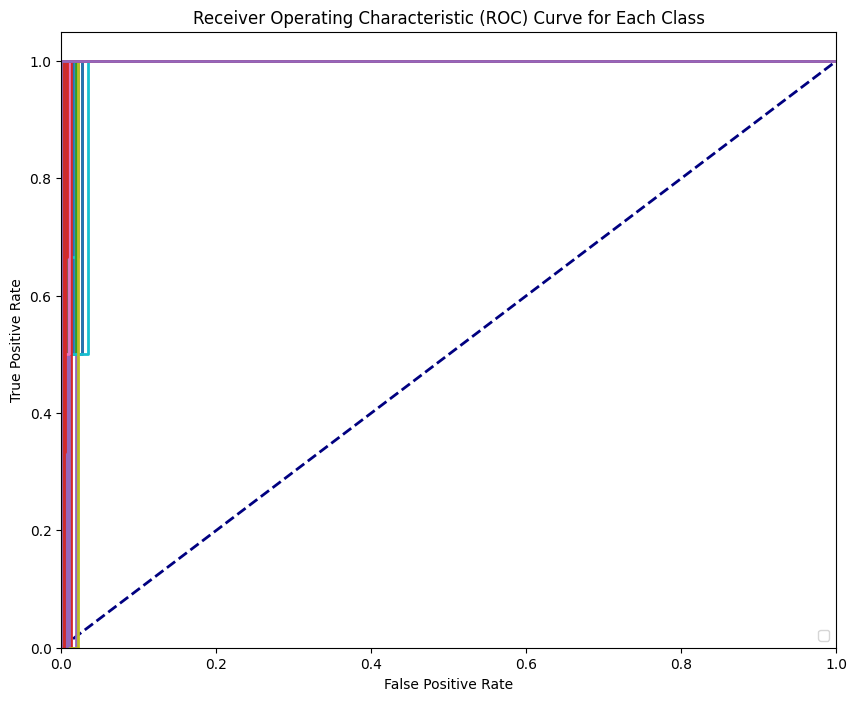

In [182]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  ## this is the state of a random classifier

for i in range(num_classes):
    if not math.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], lw=2)#label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [184]:
eer_thresholds = []

for i in range(num_classes):
    try:
        fpr_values = fpr[i]
        tpr_values = tpr[i]
        interp_fn = interp1d(fpr_values, tpr_values)
        def eer_fn(x):
            return 1.0 - x - interp_fn(x)

        eer_threshold = brentq(eer_fn, 0.0, 1.0)
        eer_thresholds.append(eer_threshold)
    except ValueError:
        continue

avg_eer_threshold = np.mean(eer_thresholds)
print(f"Equal Error Rate (EER) Threshold: {avg_eer_threshold:.4f}")

Equal Error Rate (EER) Threshold: 0.0003
